Обнаружено сообществ: 51
Результат сохранён в файл: data/communities.json


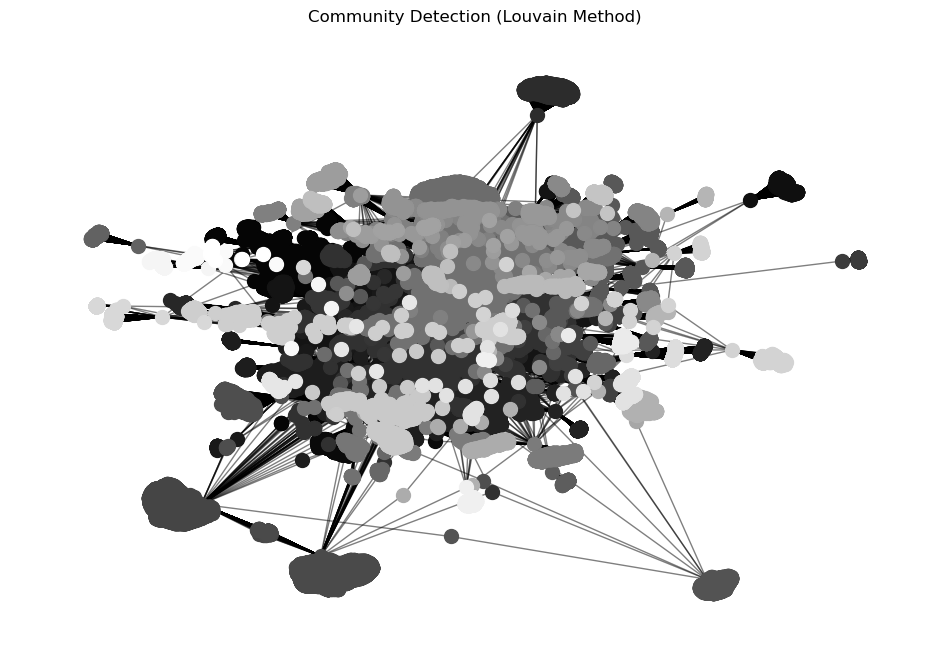

In [2]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json

input_graph_file = "data/vk_network.csv"

df = pd.read_csv(input_graph_file)
G = nx.from_pandas_edgelist(df)

partition = community.best_partition(G)

num_communities = len(set(partition.values()))
print(f"Обнаружено сообществ: 51")

communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

with open("data/communities.json", "w") as f:
    json.dump(communities, f)

print("Результат сохранён в файл: data/communities.json")

size = float(num_communities)
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 8))
count = 0.
for com in set(partition.values()):
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=100, node_color=str(count / size))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Detection (Louvain Method)")
plt.axis('off')
plt.show()